In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import warnings
warnings.filterwarnings('ignore')

In [94]:
data_train_path = 'Deep Learning/Fruits_Vegetables/train'
data_test_path = 'Deep Learning/Fruits_Vegetables/test'
data_val_path = 'Deep Learning/Fruits_Vegetables/validation'

In [96]:
img_width = 180
img_height = 180

In [98]:
# dataset is in the form of images, to approach them we need to bring them in form of arrays
# lead the dataset from disk and load in array

In [100]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle = True,
    image_size = (img_width, img_height),
    batch_size = 32,
    validation_split = False)

Found 3116 files belonging to 36 classes.


In [102]:
# diff types of fruits/vegetables
data_cat = data_train.class_names
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [104]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                      image_size=(img_height, img_width),
                                                      batch_size = 32,
                                                      shuffle = False,
                                                      validation_split = False)

Found 351 files belonging to 36 classes.


In [106]:
data_test = tf.keras.utils.image_dataset_from_directory(data_test_path,
                                                      image_size=(img_height, img_width),
                                                      batch_size = 32,
                                                      shuffle = False,
                                                      validation_split = False)

Found 359 files belonging to 36 classes.


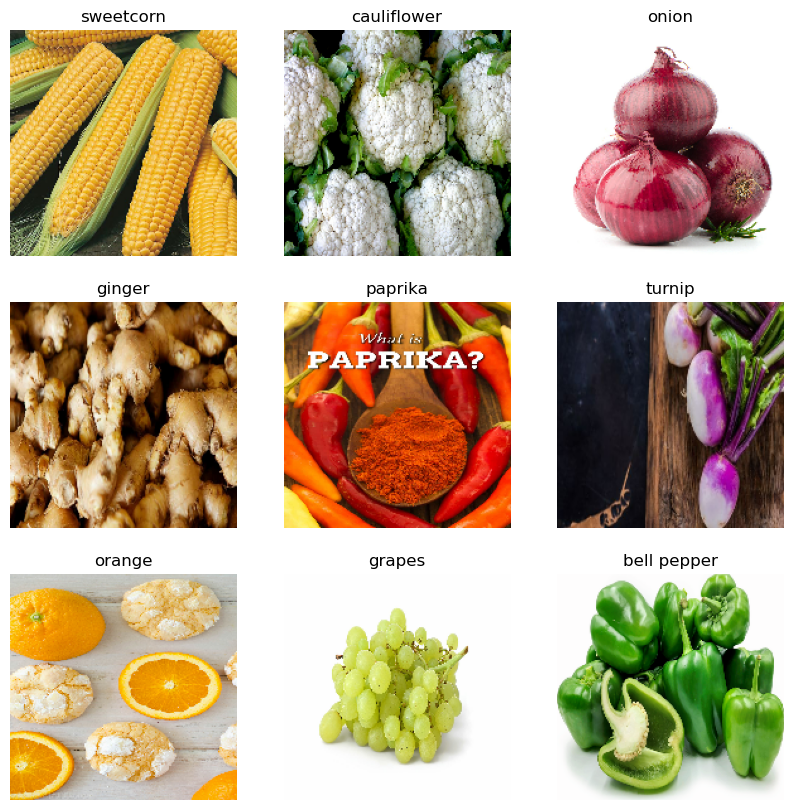

In [108]:
# let's print few images from training dataset
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [110]:
from tensorflow.keras.models import Sequential

In [112]:
data_train

# shape=(None,  180,               180,            3)
             # (pixel_of_height, pixel_of_weight, RGB)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [114]:
# sequemtial model

model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),             #input
    layers.MaxPooling2D(),                                                 # output, like these 3 layers
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

# dropout is used --> so that model doesn't overfit

In [116]:
# 3 parameters we need to pass --> optimizer, loss fn, metrics
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [118]:
epochs_size = 25
history = model.fit(data_train, validation_data = data_val, epochs=epochs_size)

# 3115/32 = 98

Epoch 1/25
 1/98 ━━━━━━━━━━━━━━━━━━━━ 1:29 920ms/step - accuracy: 0.0312 - loss: 3.5899

2024-08-23 17:26:27.190876: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 18s 201ms/step - accuracy: 0.0293 - loss: 4.2782

2024-08-23 17:26:27.701159: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 17s 191ms/step - accuracy: 0.0298 - loss: 4.2642

2024-08-23 17:26:28.104042: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 16s 181ms/step - accuracy: 0.0317 - loss: 4.1915

2024-08-23 17:26:28.538780: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 14s 177ms/step - accuracy: 0.0307 - loss: 4.0836

2024-08-23 17:26:29.410148: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


34/98 ━━━━━━━━━━━━━━━━━━━━ 10s 167ms/step - accuracy: 0.0395 - loss: 3.8570

2024-08-23 17:26:32.620478: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:26:32.792845: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:26:32.814559: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


37/98 ━━━━━━━━━━━━━━━━━━━━ 10s 167ms/step - accuracy: 0.0407 - loss: 3.8361

2024-08-23 17:26:33.131390: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:26:33.157531: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:26:33.275006: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:26:33.277243: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 ━━━━━━━━━━━━━━━━━━━━ 9s 167ms/step - accuracy: 0.0443 - loss: 3.7910

2024-08-23 17:26:34.293070: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 7s 166ms/step - accuracy: 0.0479 - loss: 3.7511

2024-08-23 17:26:35.446223: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:26:35.605740: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 6s 165ms/step - accuracy: 0.0535 - loss: 3.7002

2024-08-23 17:26:37.038232: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:26:37.194854: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:26:37.207558: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 4s 167ms/step - accuracy: 0.0584 - loss: 3.6581

2024-08-23 17:26:38.623634: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


77/98 ━━━━━━━━━━━━━━━━━━━━ 3s 167ms/step - accuracy: 0.0623 - loss: 3.6278

2024-08-23 17:26:39.825970: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


80/98 ━━━━━━━━━━━━━━━━━━━━ 3s 167ms/step - accuracy: 0.0639 - loss: 3.6154

2024-08-23 17:26:40.318349: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:26:40.322477: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


89/98 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step - accuracy: 0.0689 - loss: 3.5799

2024-08-23 17:26:41.771440: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.0738 - loss: 3.5465

2024-08-23 17:26:43.544497: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:26:43.740742: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 18s 175ms/step - accuracy: 0.0744 - loss: 3.5429 - val_accuracy: 0.3134 - val_loss: 2.4368
Epoch 2/25


2024-08-23 17:26:44.330452: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 24s 261ms/step - accuracy: 0.2726 - loss: 2.7837

2024-08-23 17:26:45.126357: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/98 ━━━━━━━━━━━━━━━━━━━━ 16s 187ms/step - accuracy: 0.2574 - loss: 2.7481

2024-08-23 17:26:46.355745: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 14s 181ms/step - accuracy: 0.2560 - loss: 2.7355

2024-08-23 17:26:47.007143: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 14s 178ms/step - accuracy: 0.2559 - loss: 2.7295

2024-08-23 17:26:47.306138: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 14s 178ms/step - accuracy: 0.2568 - loss: 2.7221

2024-08-23 17:26:47.697474: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


28/98 ━━━━━━━━━━━━━━━━━━━━ 12s 176ms/step - accuracy: 0.2601 - loss: 2.6911

2024-08-23 17:26:49.234083: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 ━━━━━━━━━━━━━━━━━━━━ 11s 175ms/step - accuracy: 0.2632 - loss: 2.6700

2024-08-23 17:26:50.474229: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:26:50.477756: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:26:50.618531: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 10s 174ms/step - accuracy: 0.2648 - loss: 2.6617

2024-08-23 17:26:50.926697: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:26:50.979602: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 10s 175ms/step - accuracy: 0.2652 - loss: 2.6590

2024-08-23 17:26:51.139792: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:26:51.316990: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 8s 174ms/step - accuracy: 0.2723 - loss: 2.6274

2024-08-23 17:26:53.184044: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


59/98 ━━━━━━━━━━━━━━━━━━━━ 6s 173ms/step - accuracy: 0.2772 - loss: 2.6086

2024-08-23 17:26:54.499357: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


60/98 ━━━━━━━━━━━━━━━━━━━━ 6s 173ms/step - accuracy: 0.2777 - loss: 2.6065

2024-08-23 17:26:54.714952: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 6s 174ms/step - accuracy: 0.2788 - loss: 2.6022

2024-08-23 17:26:55.055437: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 5s 173ms/step - accuracy: 0.2808 - loss: 2.5940

2024-08-23 17:26:55.730529: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 4s 173ms/step - accuracy: 0.2842 - loss: 2.5782

2024-08-23 17:26:57.076410: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


76/98 ━━━━━━━━━━━━━━━━━━━━ 3s 173ms/step - accuracy: 0.2851 - loss: 2.5744

2024-08-23 17:26:57.467045: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 3s 173ms/step - accuracy: 0.2859 - loss: 2.5708

2024-08-23 17:26:57.781908: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:26:57.976068: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.2929 - loss: 2.5386

2024-08-23 17:27:01.304506: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:27:01.502373: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 18s 179ms/step - accuracy: 0.2932 - loss: 2.5371 - val_accuracy: 0.5897 - val_loss: 1.4915
Epoch 3/25


2024-08-23 17:27:02.032456: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 30s 319ms/step - accuracy: 0.4688 - loss: 1.7909

2024-08-23 17:27:02.380161: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 19s 208ms/step - accuracy: 0.4199 - loss: 1.9318

2024-08-23 17:27:02.815075: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 12s 174ms/step - accuracy: 0.4001 - loss: 1.9747

2024-08-23 17:27:06.205657: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 11s 175ms/step - accuracy: 0.4057 - loss: 1.9731

2024-08-23 17:27:07.258859: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:27:07.443657: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


31/98 ━━━━━━━━━━━━━━━━━━━━ 11s 176ms/step - accuracy: 0.4064 - loss: 1.9730

2024-08-23 17:27:07.461671: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


34/98 ━━━━━━━━━━━━━━━━━━━━ 11s 174ms/step - accuracy: 0.4082 - loss: 1.9724

2024-08-23 17:27:07.980712: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:27:08.103260: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


37/98 ━━━━━━━━━━━━━━━━━━━━ 10s 173ms/step - accuracy: 0.4097 - loss: 1.9710

2024-08-23 17:27:08.433020: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 10s 173ms/step - accuracy: 0.4105 - loss: 1.9697

2024-08-23 17:27:08.771009: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 9s 173ms/step - accuracy: 0.4119 - loss: 1.9669

2024-08-23 17:27:09.480006: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:27:09.630175: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


53/98 ━━━━━━━━━━━━━━━━━━━━ 7s 171ms/step - accuracy: 0.4167 - loss: 1.9561

2024-08-23 17:27:11.095385: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


55/98 ━━━━━━━━━━━━━━━━━━━━ 7s 171ms/step - accuracy: 0.4176 - loss: 1.9541

2024-08-23 17:27:11.436018: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


59/98 ━━━━━━━━━━━━━━━━━━━━ 6s 171ms/step - accuracy: 0.4195 - loss: 1.9497

2024-08-23 17:27:12.151297: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 6s 171ms/step - accuracy: 0.4205 - loss: 1.9476

2024-08-23 17:27:12.487901: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 5s 171ms/step - accuracy: 0.4214 - loss: 1.9459

2024-08-23 17:27:12.790346: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


71/98 ━━━━━━━━━━━━━━━━━━━━ 4s 171ms/step - accuracy: 0.4254 - loss: 1.9379

2024-08-23 17:27:14.167127: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 4s 171ms/step - accuracy: 0.4268 - loss: 1.9351

2024-08-23 17:27:14.630033: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 3s 171ms/step - accuracy: 0.4286 - loss: 1.9318

2024-08-23 17:27:15.347706: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 2s 171ms/step - accuracy: 0.4313 - loss: 1.9263

2024-08-23 17:27:16.567440: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:27:16.729653: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.4355 - loss: 1.9169

2024-08-23 17:27:19.033394: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:27:19.222521: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 18s 180ms/step - accuracy: 0.4358 - loss: 1.9162 - val_accuracy: 0.7208 - val_loss: 1.0622
Epoch 4/25
 2/98 ━━━━━━━━━━━━━━━━━━━━ 15s 164ms/step - accuracy: 0.4844 - loss: 1.8737

2024-08-23 17:27:20.290732: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:27:20.465367: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 17s 182ms/step - accuracy: 0.5035 - loss: 1.8102

2024-08-23 17:27:20.516857: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/98 ━━━━━━━━━━━━━━━━━━━━ 14s 171ms/step - accuracy: 0.5289 - loss: 1.6812

2024-08-23 17:27:21.842341: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 14s 173ms/step - accuracy: 0.5331 - loss: 1.6531

2024-08-23 17:27:22.354342: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:27:22.527948: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


28/98 ━━━━━━━━━━━━━━━━━━━━ 12s 172ms/step - accuracy: 0.5522 - loss: 1.5821

2024-08-23 17:27:24.789603: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 ━━━━━━━━━━━━━━━━━━━━ 10s 172ms/step - accuracy: 0.5568 - loss: 1.5568

2024-08-23 17:27:26.006209: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


37/98 ━━━━━━━━━━━━━━━━━━━━ 10s 174ms/step - accuracy: 0.5584 - loss: 1.5499

2024-08-23 17:27:26.342941: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:27:26.346117: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 10s 174ms/step - accuracy: 0.5589 - loss: 1.5471

2024-08-23 17:27:26.580031: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


41/98 ━━━━━━━━━━━━━━━━━━━━ 9s 175ms/step - accuracy: 0.5602 - loss: 1.5390 

2024-08-23 17:27:27.125323: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 9s 175ms/step - accuracy: 0.5611 - loss: 1.5341

2024-08-23 17:27:27.460253: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


56/98 ━━━━━━━━━━━━━━━━━━━━ 7s 173ms/step - accuracy: 0.5675 - loss: 1.5039

2024-08-23 17:27:29.648166: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


59/98 ━━━━━━━━━━━━━━━━━━━━ 6s 173ms/step - accuracy: 0.5693 - loss: 1.4974

2024-08-23 17:27:30.156271: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 5s 172ms/step - accuracy: 0.5728 - loss: 1.4848

2024-08-23 17:27:31.152033: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:27:31.161140: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


69/98 ━━━━━━━━━━━━━━━━━━━━ 5s 173ms/step - accuracy: 0.5751 - loss: 1.4765

2024-08-23 17:27:31.894562: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 3s 172ms/step - accuracy: 0.5781 - loss: 1.4648

2024-08-23 17:27:32.881856: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


82/98 ━━━━━━━━━━━━━━━━━━━━ 2s 172ms/step - accuracy: 0.5812 - loss: 1.4527

2024-08-23 17:27:34.034663: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 2s 172ms/step - accuracy: 0.5824 - loss: 1.4480

2024-08-23 17:27:34.560242: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:27:34.741227: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


89/98 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step - accuracy: 0.5840 - loss: 1.4419

2024-08-23 17:27:35.216426: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.5873 - loss: 1.4292

2024-08-23 17:27:37.020903: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:27:37.256322: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 18s 181ms/step - accuracy: 0.5876 - loss: 1.4279 - val_accuracy: 0.8604 - val_loss: 0.5858
Epoch 5/25


2024-08-23 17:27:37.981270: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 53s 551ms/step - accuracy: 0.6562 - loss: 0.9559

2024-08-23 17:27:38.283196: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 15s 171ms/step - accuracy: 0.6733 - loss: 1.0532

2024-08-23 17:27:39.050311: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:27:39.241463: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 13s 164ms/step - accuracy: 0.6902 - loss: 1.0248

2024-08-23 17:27:40.172766: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


28/98 ━━━━━━━━━━━━━━━━━━━━ 11s 171ms/step - accuracy: 0.7056 - loss: 0.9993

2024-08-23 17:27:42.794324: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:27:42.805715: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


33/98 ━━━━━━━━━━━━━━━━━━━━ 11s 171ms/step - accuracy: 0.7079 - loss: 0.9919

2024-08-23 17:27:43.687719: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 10s 170ms/step - accuracy: 0.7096 - loss: 0.9848

2024-08-23 17:27:44.528837: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:27:44.682378: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


41/98 ━━━━━━━━━━━━━━━━━━━━ 9s 170ms/step - accuracy: 0.7109 - loss: 0.9803

2024-08-23 17:27:45.013167: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


46/98 ━━━━━━━━━━━━━━━━━━━━ 8s 171ms/step - accuracy: 0.7135 - loss: 0.9718

2024-08-23 17:27:45.937655: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:27:46.084995: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 7s 171ms/step - accuracy: 0.7178 - loss: 0.9581

2024-08-23 17:27:47.262386: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


55/98 ━━━━━━━━━━━━━━━━━━━━ 7s 171ms/step - accuracy: 0.7183 - loss: 0.9564

2024-08-23 17:27:47.466066: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


59/98 ━━━━━━━━━━━━━━━━━━━━ 6s 170ms/step - accuracy: 0.7203 - loss: 0.9505

2024-08-23 17:27:48.095788: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 6s 170ms/step - accuracy: 0.7216 - loss: 0.9463

2024-08-23 17:27:48.606907: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 ━━━━━━━━━━━━━━━━━━━━ 5s 170ms/step - accuracy: 0.7241 - loss: 0.9389

2024-08-23 17:27:49.578508: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:27:49.760923: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


76/98 ━━━━━━━━━━━━━━━━━━━━ 3s 169ms/step - accuracy: 0.7271 - loss: 0.9294

2024-08-23 17:27:50.959687: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


81/98 ━━━━━━━━━━━━━━━━━━━━ 2s 169ms/step - accuracy: 0.7289 - loss: 0.9237

2024-08-23 17:27:51.762884: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


88/98 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step - accuracy: 0.7311 - loss: 0.9167

2024-08-23 17:27:52.956802: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:27:53.146454: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.7341 - loss: 0.9075

2024-08-23 17:27:54.959915: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:27:55.164571: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 18s 179ms/step - accuracy: 0.7343 - loss: 0.9066 - val_accuracy: 0.9060 - val_loss: 0.4348
Epoch 6/25


2024-08-23 17:27:55.710306: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 45s 467ms/step - accuracy: 0.7188 - loss: 0.6666

2024-08-23 17:27:56.069322: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/98 ━━━━━━━━━━━━━━━━━━━━ 14s 166ms/step - accuracy: 0.8076 - loss: 0.6702

2024-08-23 17:27:57.698530: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 14s 170ms/step - accuracy: 0.8108 - loss: 0.6617

2024-08-23 17:27:58.054858: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:27:58.227003: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


29/98 ━━━━━━━━━━━━━━━━━━━━ 11s 173ms/step - accuracy: 0.8209 - loss: 0.6391

2024-08-23 17:28:00.862765: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


36/98 ━━━━━━━━━━━━━━━━━━━━ 10s 176ms/step - accuracy: 0.8237 - loss: 0.6313

2024-08-23 17:28:02.206830: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 10s 175ms/step - accuracy: 0.8253 - loss: 0.6255

2024-08-23 17:28:02.818004: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:28:02.834795: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 9s 175ms/step - accuracy: 0.8268 - loss: 0.6207

2024-08-23 17:28:03.362727: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:28:03.379776: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


46/98 ━━━━━━━━━━━━━━━━━━━━ 9s 176ms/step - accuracy: 0.8282 - loss: 0.6157

2024-08-23 17:28:03.906070: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


49/98 ━━━━━━━━━━━━━━━━━━━━ 8s 174ms/step - accuracy: 0.8296 - loss: 0.6108

2024-08-23 17:28:04.410452: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:28:04.413812: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


56/98 ━━━━━━━━━━━━━━━━━━━━ 7s 173ms/step - accuracy: 0.8321 - loss: 0.6007

2024-08-23 17:28:05.566745: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 ━━━━━━━━━━━━━━━━━━━━ 6s 174ms/step - accuracy: 0.8327 - loss: 0.5983

2024-08-23 17:28:05.896975: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


64/98 ━━━━━━━━━━━━━━━━━━━━ 5s 173ms/step - accuracy: 0.8341 - loss: 0.5919

2024-08-23 17:28:06.945625: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


67/98 ━━━━━━━━━━━━━━━━━━━━ 5s 172ms/step - accuracy: 0.8348 - loss: 0.5888

2024-08-23 17:28:07.414530: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


71/98 ━━━━━━━━━━━━━━━━━━━━ 4s 172ms/step - accuracy: 0.8356 - loss: 0.5850

2024-08-23 17:28:08.072492: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


81/98 ━━━━━━━━━━━━━━━━━━━━ 2s 172ms/step - accuracy: 0.8369 - loss: 0.5783

2024-08-23 17:28:09.810321: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:28:09.969308: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


90/98 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step - accuracy: 0.8379 - loss: 0.5731

2024-08-23 17:28:11.361691: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:28:11.378636: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.8390 - loss: 0.5685

2024-08-23 17:28:13.037606: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:28:13.252347: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 18s 182ms/step - accuracy: 0.8391 - loss: 0.5680 - val_accuracy: 0.9060 - val_loss: 0.4708
Epoch 7/25


2024-08-23 17:28:13.802156: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 24s 262ms/step - accuracy: 0.8733 - loss: 0.6375

2024-08-23 17:28:14.438035: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 23s 255ms/step - accuracy: 0.8717 - loss: 0.6165

2024-08-23 17:28:14.696274: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 17s 196ms/step - accuracy: 0.8816 - loss: 0.5159

2024-08-23 17:28:15.649089: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 16s 189ms/step - accuracy: 0.8842 - loss: 0.4916

2024-08-23 17:28:16.166772: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 13s 181ms/step - accuracy: 0.8881 - loss: 0.4581

2024-08-23 17:28:17.490396: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


27/98 ━━━━━━━━━━━━━━━━━━━━ 12s 179ms/step - accuracy: 0.8902 - loss: 0.4456

2024-08-23 17:28:18.571794: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


29/98 ━━━━━━━━━━━━━━━━━━━━ 12s 178ms/step - accuracy: 0.8905 - loss: 0.4429

2024-08-23 17:28:18.908674: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


31/98 ━━━━━━━━━━━━━━━━━━━━ 11s 178ms/step - accuracy: 0.8909 - loss: 0.4401

2024-08-23 17:28:19.231880: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


34/98 ━━━━━━━━━━━━━━━━━━━━ 11s 178ms/step - accuracy: 0.8917 - loss: 0.4363

2024-08-23 17:28:19.753205: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 10s 179ms/step - accuracy: 0.8925 - loss: 0.4316

2024-08-23 17:28:20.553295: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:28:20.718513: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 10s 179ms/step - accuracy: 0.8929 - loss: 0.4292

2024-08-23 17:28:20.877884: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 8s 179ms/step - accuracy: 0.8942 - loss: 0.4210

2024-08-23 17:28:22.289835: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 ━━━━━━━━━━━━━━━━━━━━ 7s 177ms/step - accuracy: 0.8954 - loss: 0.4120

2024-08-23 17:28:23.978466: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


60/98 ━━━━━━━━━━━━━━━━━━━━ 6s 176ms/step - accuracy: 0.8957 - loss: 0.4100

2024-08-23 17:28:24.337872: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:28:24.469497: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


67/98 ━━━━━━━━━━━━━━━━━━━━ 5s 176ms/step - accuracy: 0.8970 - loss: 0.4031

2024-08-23 17:28:25.507583: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 4s 176ms/step - accuracy: 0.8975 - loss: 0.4001

2024-08-23 17:28:26.063313: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 3s 176ms/step - accuracy: 0.8988 - loss: 0.3929

2024-08-23 17:28:27.432375: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


82/98 ━━━━━━━━━━━━━━━━━━━━ 2s 175ms/step - accuracy: 0.8994 - loss: 0.3896

2024-08-23 17:28:28.105656: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 2s 175ms/step - accuracy: 0.8999 - loss: 0.3872

2024-08-23 17:28:28.571329: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


87/98 ━━━━━━━━━━━━━━━━━━━━ 1s 175ms/step - accuracy: 0.9002 - loss: 0.3857

2024-08-23 17:28:28.922846: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.9018 - loss: 0.3774

2024-08-23 17:28:31.001699: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:28:31.199007: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 18s 182ms/step - accuracy: 0.9019 - loss: 0.3767 - val_accuracy: 0.9345 - val_loss: 0.4599
Epoch 8/25
 2/98 ━━━━━━━━━━━━━━━━━━━━ 19s 203ms/step - accuracy: 0.9688 - loss: 0.1514

2024-08-23 17:28:32.148233: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:28:32.293620: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 7/98 ━━━━━━━━━━━━━━━━━━━━ 16s 177ms/step - accuracy: 0.9442 - loss: 0.2806

2024-08-23 17:28:32.935104: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 14s 172ms/step - accuracy: 0.9379 - loss: 0.2981

2024-08-23 17:28:34.319979: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 13s 171ms/step - accuracy: 0.9380 - loss: 0.2957

2024-08-23 17:28:34.810265: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 ━━━━━━━━━━━━━━━━━━━━ 10s 173ms/step - accuracy: 0.9396 - loss: 0.3018

2024-08-23 17:28:37.820884: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:28:37.962300: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


37/98 ━━━━━━━━━━━━━━━━━━━━ 10s 173ms/step - accuracy: 0.9398 - loss: 0.3008

2024-08-23 17:28:38.117125: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:28:38.290829: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


41/98 ━━━━━━━━━━━━━━━━━━━━ 9s 173ms/step - accuracy: 0.9403 - loss: 0.2992 

2024-08-23 17:28:38.812203: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 9s 173ms/step - accuracy: 0.9405 - loss: 0.2984

2024-08-23 17:28:39.163223: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


46/98 ━━━━━━━━━━━━━━━━━━━━ 8s 173ms/step - accuracy: 0.9407 - loss: 0.2971

2024-08-23 17:28:39.654670: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


49/98 ━━━━━━━━━━━━━━━━━━━━ 8s 172ms/step - accuracy: 0.9409 - loss: 0.2953

2024-08-23 17:28:40.153586: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:28:40.306669: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


59/98 ━━━━━━━━━━━━━━━━━━━━ 6s 172ms/step - accuracy: 0.9419 - loss: 0.2891

2024-08-23 17:28:41.906529: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:28:42.003927: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


64/98 ━━━━━━━━━━━━━━━━━━━━ 5s 172ms/step - accuracy: 0.9424 - loss: 0.2862

2024-08-23 17:28:42.723475: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 5s 172ms/step - accuracy: 0.9425 - loss: 0.2850

2024-08-23 17:28:43.081818: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


76/98 ━━━━━━━━━━━━━━━━━━━━ 3s 172ms/step - accuracy: 0.9431 - loss: 0.2799

2024-08-23 17:28:44.815784: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


79/98 ━━━━━━━━━━━━━━━━━━━━ 3s 172ms/step - accuracy: 0.9432 - loss: 0.2787

2024-08-23 17:28:45.297037: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


82/98 ━━━━━━━━━━━━━━━━━━━━ 2s 172ms/step - accuracy: 0.9433 - loss: 0.2775

2024-08-23 17:28:45.830987: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:28:45.986864: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


92/98 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step - accuracy: 0.9436 - loss: 0.2733

2024-08-23 17:28:47.477682: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.9437 - loss: 0.2710

2024-08-23 17:28:48.816573: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:28:49.004695: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 18s 180ms/step - accuracy: 0.9437 - loss: 0.2706 - val_accuracy: 0.9430 - val_loss: 0.4205
Epoch 9/25


2024-08-23 17:28:49.570706: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 16s 175ms/step - accuracy: 0.9609 - loss: 0.1788

2024-08-23 17:28:50.355323: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:28:50.366813: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 14s 168ms/step - accuracy: 0.9488 - loss: 0.1991

2024-08-23 17:28:51.157748: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 14s 169ms/step - accuracy: 0.9489 - loss: 0.1958

2024-08-23 17:28:51.685876: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:28:51.883599: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


31/98 ━━━━━━━━━━━━━━━━━━━━ 11s 170ms/step - accuracy: 0.9506 - loss: 0.2139

2024-08-23 17:28:54.936454: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


33/98 ━━━━━━━━━━━━━━━━━━━━ 11s 170ms/step - accuracy: 0.9508 - loss: 0.2150

2024-08-23 17:28:55.255497: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:28:55.443031: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 10s 170ms/step - accuracy: 0.9513 - loss: 0.2164

2024-08-23 17:28:56.261758: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 9s 171ms/step - accuracy: 0.9516 - loss: 0.2163

2024-08-23 17:28:57.014692: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 ━━━━━━━━━━━━━━━━━━━━ 8s 171ms/step - accuracy: 0.9519 - loss: 0.2160

2024-08-23 17:28:57.861943: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


50/98 ━━━━━━━━━━━━━━━━━━━━ 8s 172ms/step - accuracy: 0.9520 - loss: 0.2157

2024-08-23 17:28:58.232358: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


52/98 ━━━━━━━━━━━━━━━━━━━━ 7s 172ms/step - accuracy: 0.9522 - loss: 0.2155

2024-08-23 17:28:58.593978: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 6s 171ms/step - accuracy: 0.9529 - loss: 0.2140

2024-08-23 17:29:00.104513: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 5s 171ms/step - accuracy: 0.9530 - loss: 0.2136

2024-08-23 17:29:00.413671: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 5s 170ms/step - accuracy: 0.9531 - loss: 0.2131

2024-08-23 17:29:00.722678: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


69/98 ━━━━━━━━━━━━━━━━━━━━ 4s 171ms/step - accuracy: 0.9533 - loss: 0.2121

2024-08-23 17:29:01.417473: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 4s 171ms/step - accuracy: 0.9533 - loss: 0.2118

2024-08-23 17:29:01.643077: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:29:01.763877: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


77/98 ━━━━━━━━━━━━━━━━━━━━ 3s 170ms/step - accuracy: 0.9537 - loss: 0.2095

2024-08-23 17:29:02.754442: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 2s 170ms/step - accuracy: 0.9541 - loss: 0.2069

2024-08-23 17:29:04.086791: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


92/98 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step - accuracy: 0.9545 - loss: 0.2044

2024-08-23 17:29:05.291817: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.9549 - loss: 0.2023

2024-08-23 17:29:06.645366: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:29:06.843883: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 18s 180ms/step - accuracy: 0.9550 - loss: 0.2019 - val_accuracy: 0.9459 - val_loss: 0.4679
Epoch 10/25
 2/98 ━━━━━━━━━━━━━━━━━━━━ 29s 308ms/step - accuracy: 0.9844 - loss: 0.1434

2024-08-23 17:29:08.098758: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:29:08.222061: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:29:08.243452: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 21s 231ms/step - accuracy: 0.9811 - loss: 0.1358

2024-08-23 17:29:08.357094: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 15s 185ms/step - accuracy: 0.9717 - loss: 0.1384

2024-08-23 17:29:09.725700: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


20/98 ━━━━━━━━━━━━━━━━━━━━ 14s 181ms/step - accuracy: 0.9719 - loss: 0.1397

2024-08-23 17:29:11.090696: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 13s 179ms/step - accuracy: 0.9724 - loss: 0.1464

2024-08-23 17:29:12.007192: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


28/98 ━━━━━━━━━━━━━━━━━━━━ 12s 180ms/step - accuracy: 0.9725 - loss: 0.1500

2024-08-23 17:29:12.496934: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 ━━━━━━━━━━━━━━━━━━━━ 11s 180ms/step - accuracy: 0.9730 - loss: 0.1540

2024-08-23 17:29:13.758640: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:29:13.781839: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


36/98 ━━━━━━━━━━━━━━━━━━━━ 11s 179ms/step - accuracy: 0.9731 - loss: 0.1542

2024-08-23 17:29:13.962647: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 10s 178ms/step - accuracy: 0.9732 - loss: 0.1546

2024-08-23 17:29:14.276260: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 ━━━━━━━━━━━━━━━━━━━━ 9s 177ms/step - accuracy: 0.9737 - loss: 0.1557

2024-08-23 17:29:15.267293: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 7s 175ms/step - accuracy: 0.9743 - loss: 0.1573

2024-08-23 17:29:16.915921: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 7s 176ms/step - accuracy: 0.9745 - loss: 0.1572

2024-08-23 17:29:17.481442: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:29:17.533147: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 6s 175ms/step - accuracy: 0.9747 - loss: 0.1570

2024-08-23 17:29:18.483274: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


69/98 ━━━━━━━━━━━━━━━━━━━━ 5s 174ms/step - accuracy: 0.9748 - loss: 0.1570

2024-08-23 17:29:19.519220: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


72/98 ━━━━━━━━━━━━━━━━━━━━ 4s 174ms/step - accuracy: 0.9748 - loss: 0.1568

2024-08-23 17:29:20.013209: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


76/98 ━━━━━━━━━━━━━━━━━━━━ 3s 174ms/step - accuracy: 0.9747 - loss: 0.1564

2024-08-23 17:29:20.684835: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:29:20.870779: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


81/98 ━━━━━━━━━━━━━━━━━━━━ 2s 174ms/step - accuracy: 0.9746 - loss: 0.1561

2024-08-23 17:29:21.594652: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 2s 174ms/step - accuracy: 0.9746 - loss: 0.1561

2024-08-23 17:29:22.279378: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.9741 - loss: 0.1565

2024-08-23 17:29:24.695836: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:29:24.903042: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 18s 181ms/step - accuracy: 0.9741 - loss: 0.1565 - val_accuracy: 0.9402 - val_loss: 0.4121
Epoch 11/25


2024-08-23 17:29:25.466201: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 14s 169ms/step - accuracy: 0.9571 - loss: 0.1387

2024-08-23 17:29:27.254391: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 14s 171ms/step - accuracy: 0.9561 - loss: 0.1437

2024-08-23 17:29:27.567085: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 14s 171ms/step - accuracy: 0.9553 - loss: 0.1478

2024-08-23 17:29:27.902808: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:29:28.099194: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:29:28.099521: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 11s 173ms/step - accuracy: 0.9551 - loss: 0.1594

2024-08-23 17:29:31.064406: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 10s 172ms/step - accuracy: 0.9555 - loss: 0.1623

2024-08-23 17:29:32.075688: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


42/98 ━━━━━━━━━━━━━━━━━━━━ 9s 171ms/step - accuracy: 0.9559 - loss: 0.1630

2024-08-23 17:29:32.713511: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 ━━━━━━━━━━━━━━━━━━━━ 9s 171ms/step - accuracy: 0.9560 - loss: 0.1632

2024-08-23 17:29:33.036923: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 ━━━━━━━━━━━━━━━━━━━━ 8s 171ms/step - accuracy: 0.9563 - loss: 0.1634

2024-08-23 17:29:33.576919: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


50/98 ━━━━━━━━━━━━━━━━━━━━ 8s 171ms/step - accuracy: 0.9566 - loss: 0.1636

2024-08-23 17:29:34.086580: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:29:34.271480: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 6s 171ms/step - accuracy: 0.9570 - loss: 0.1642

2024-08-23 17:29:35.251724: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:29:35.441054: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


60/98 ━━━━━━━━━━━━━━━━━━━━ 6s 170ms/step - accuracy: 0.9572 - loss: 0.1642

2024-08-23 17:29:35.756985: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:29:35.899331: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 5s 171ms/step - accuracy: 0.9574 - loss: 0.1642

2024-08-23 17:29:36.274115: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


76/98 ━━━━━━━━━━━━━━━━━━━━ 3s 171ms/step - accuracy: 0.9577 - loss: 0.1655

2024-08-23 17:29:38.528439: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:29:38.660970: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


79/98 ━━━━━━━━━━━━━━━━━━━━ 3s 171ms/step - accuracy: 0.9577 - loss: 0.1659

2024-08-23 17:29:39.044842: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


82/98 ━━━━━━━━━━━━━━━━━━━━ 2s 171ms/step - accuracy: 0.9578 - loss: 0.1661

2024-08-23 17:29:39.589563: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 2s 171ms/step - accuracy: 0.9578 - loss: 0.1661

2024-08-23 17:29:40.094025: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.9583 - loss: 0.1661

2024-08-23 17:29:42.612765: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:29:42.814256: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 18s 180ms/step - accuracy: 0.9583 - loss: 0.1661 - val_accuracy: 0.9544 - val_loss: 0.3512
Epoch 12/25


2024-08-23 17:29:43.350669: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 19s 205ms/step - accuracy: 0.9753 - loss: 0.1702

2024-08-23 17:29:44.144356: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 19s 210ms/step - accuracy: 0.9741 - loss: 0.1847

2024-08-23 17:29:44.557108: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 16s 188ms/step - accuracy: 0.9723 - loss: 0.1847

2024-08-23 17:29:45.054053: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 15s 184ms/step - accuracy: 0.9717 - loss: 0.1779

2024-08-23 17:29:45.538593: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:29:45.622035: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 11s 176ms/step - accuracy: 0.9677 - loss: 0.1737

2024-08-23 17:29:48.663499: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


33/98 ━━━━━━━━━━━━━━━━━━━━ 11s 175ms/step - accuracy: 0.9677 - loss: 0.1733

2024-08-23 17:29:49.178521: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


36/98 ━━━━━━━━━━━━━━━━━━━━ 10s 174ms/step - accuracy: 0.9678 - loss: 0.1724

2024-08-23 17:29:49.644573: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:29:49.795384: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 10s 173ms/step - accuracy: 0.9679 - loss: 0.1715

2024-08-23 17:29:49.955799: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 ━━━━━━━━━━━━━━━━━━━━ 9s 173ms/step - accuracy: 0.9680 - loss: 0.1691

2024-08-23 17:29:50.994051: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:29:51.155777: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 8s 174ms/step - accuracy: 0.9681 - loss: 0.1669

2024-08-23 17:29:52.263085: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


55/98 ━━━━━━━━━━━━━━━━━━━━ 7s 174ms/step - accuracy: 0.9682 - loss: 0.1652

2024-08-23 17:29:52.930450: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:29:53.122748: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


56/98 ━━━━━━━━━━━━━━━━━━━━ 7s 174ms/step - accuracy: 0.9682 - loss: 0.1647

2024-08-23 17:29:53.140070: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 6s 174ms/step - accuracy: 0.9686 - loss: 0.1611

2024-08-23 17:29:54.328799: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:29:54.517434: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


71/98 ━━━━━━━━━━━━━━━━━━━━ 4s 173ms/step - accuracy: 0.9691 - loss: 0.1569

2024-08-23 17:29:55.704877: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


81/98 ━━━━━━━━━━━━━━━━━━━━ 2s 174ms/step - accuracy: 0.9699 - loss: 0.1517

2024-08-23 17:29:57.442257: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


83/98 ━━━━━━━━━━━━━━━━━━━━ 2s 173ms/step - accuracy: 0.9700 - loss: 0.1507

2024-08-23 17:29:57.776577: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


86/98 ━━━━━━━━━━━━━━━━━━━━ 2s 173ms/step - accuracy: 0.9703 - loss: 0.1492

2024-08-23 17:29:58.256450: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.9709 - loss: 0.1440

2024-08-23 17:30:00.466581: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:30:00.674900: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 18s 181ms/step - accuracy: 0.9710 - loss: 0.1436 - val_accuracy: 0.9573 - val_loss: 0.3436
Epoch 13/25


2024-08-23 17:30:01.332516: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 16s 170ms/step - accuracy: 0.9774 - loss: 0.1449

2024-08-23 17:30:01.740963: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 14s 168ms/step - accuracy: 0.9827 - loss: 0.1656

2024-08-23 17:30:02.954501: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 14s 168ms/step - accuracy: 0.9828 - loss: 0.1646

2024-08-23 17:30:03.622049: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 13s 169ms/step - accuracy: 0.9830 - loss: 0.1561

2024-08-23 17:30:04.442599: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


28/98 ━━━━━━━━━━━━━━━━━━━━ 12s 177ms/step - accuracy: 0.9830 - loss: 0.1514

2024-08-23 17:30:06.338082: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 ━━━━━━━━━━━━━━━━━━━━ 11s 177ms/step - accuracy: 0.9830 - loss: 0.1491

2024-08-23 17:30:07.464629: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:30:07.625866: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


36/98 ━━━━━━━━━━━━━━━━━━━━ 11s 178ms/step - accuracy: 0.9831 - loss: 0.1485

2024-08-23 17:30:07.673866: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:30:07.811451: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:30:07.847979: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 10s 178ms/step - accuracy: 0.9832 - loss: 0.1473

2024-08-23 17:30:07.985823: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 ━━━━━━━━━━━━━━━━━━━━ 8s 174ms/step - accuracy: 0.9835 - loss: 0.1427

2024-08-23 17:30:09.432236: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


55/98 ━━━━━━━━━━━━━━━━━━━━ 7s 173ms/step - accuracy: 0.9837 - loss: 0.1387

2024-08-23 17:30:10.753721: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 ━━━━━━━━━━━━━━━━━━━━ 6s 172ms/step - accuracy: 0.9837 - loss: 0.1371

2024-08-23 17:30:11.292224: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:30:11.463739: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


67/98 ━━━━━━━━━━━━━━━━━━━━ 5s 172ms/step - accuracy: 0.9838 - loss: 0.1329

2024-08-23 17:30:12.776654: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 4s 172ms/step - accuracy: 0.9837 - loss: 0.1299

2024-08-23 17:30:13.977884: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:30:13.984121: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


82/98 ━━━━━━━━━━━━━━━━━━━━ 2s 171ms/step - accuracy: 0.9837 - loss: 0.1265

2024-08-23 17:30:15.292804: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 2s 170ms/step - accuracy: 0.9837 - loss: 0.1253

2024-08-23 17:30:15.721332: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:30:15.872997: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


89/98 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step - accuracy: 0.9838 - loss: 0.1239

2024-08-23 17:30:16.449160: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.9838 - loss: 0.1210

2024-08-23 17:30:18.098879: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:30:18.297329: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 18s 178ms/step - accuracy: 0.9838 - loss: 0.1207 - val_accuracy: 0.9516 - val_loss: 0.3774
Epoch 14/25


2024-08-23 17:30:18.943725: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:30:18.945607: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 7/98 ━━━━━━━━━━━━━━━━━━━━ 15s 168ms/step - accuracy: 0.9672 - loss: 0.1807

2024-08-23 17:30:20.026177: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 15s 168ms/step - accuracy: 0.9689 - loss: 0.1761

2024-08-23 17:30:20.231254: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 14s 167ms/step - accuracy: 0.9715 - loss: 0.1673

2024-08-23 17:30:20.525268: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 13s 168ms/step - accuracy: 0.9738 - loss: 0.1580

2024-08-23 17:30:21.402548: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 ━━━━━━━━━━━━━━━━━━━━ 10s 169ms/step - accuracy: 0.9775 - loss: 0.1420

2024-08-23 17:30:24.791069: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:30:24.962444: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


37/98 ━━━━━━━━━━━━━━━━━━━━ 10s 170ms/step - accuracy: 0.9777 - loss: 0.1406

2024-08-23 17:30:25.122626: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


42/98 ━━━━━━━━━━━━━━━━━━━━ 9s 169ms/step - accuracy: 0.9783 - loss: 0.1381

2024-08-23 17:30:25.921454: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:30:25.925695: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:30:26.123815: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


50/98 ━━━━━━━━━━━━━━━━━━━━ 8s 169ms/step - accuracy: 0.9789 - loss: 0.1350

2024-08-23 17:30:27.290623: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


53/98 ━━━━━━━━━━━━━━━━━━━━ 7s 170ms/step - accuracy: 0.9792 - loss: 0.1338

2024-08-23 17:30:27.860749: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


60/98 ━━━━━━━━━━━━━━━━━━━━ 6s 169ms/step - accuracy: 0.9796 - loss: 0.1309

2024-08-23 17:30:28.983073: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:30:29.167297: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 5s 170ms/step - accuracy: 0.9798 - loss: 0.1295

2024-08-23 17:30:29.515058: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:30:29.515276: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 5s 170ms/step - accuracy: 0.9799 - loss: 0.1282

2024-08-23 17:30:30.056373: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 ━━━━━━━━━━━━━━━━━━━━ 5s 170ms/step - accuracy: 0.9800 - loss: 0.1273

2024-08-23 17:30:30.390952: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


79/98 ━━━━━━━━━━━━━━━━━━━━ 3s 169ms/step - accuracy: 0.9806 - loss: 0.1225

2024-08-23 17:30:32.221029: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


81/98 ━━━━━━━━━━━━━━━━━━━━ 2s 169ms/step - accuracy: 0.9807 - loss: 0.1218

2024-08-23 17:30:32.517361: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 2s 169ms/step - accuracy: 0.9808 - loss: 0.1208

2024-08-23 17:30:33.104367: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.9814 - loss: 0.1164

2024-08-23 17:30:35.742234: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:30:35.937357: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 18s 178ms/step - accuracy: 0.9814 - loss: 0.1161 - val_accuracy: 0.9516 - val_loss: 0.3562
Epoch 15/25
 1/98 ━━━━━━━━━━━━━━━━━━━━ 35s 362ms/step - accuracy: 1.0000 - loss: 0.0072

2024-08-23 17:30:36.604687: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 17s 188ms/step - accuracy: 0.9806 - loss: 0.1640

2024-08-23 17:30:37.594813: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:30:37.623541: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 14s 173ms/step - accuracy: 0.9818 - loss: 0.1318

2024-08-23 17:30:38.907518: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 14s 172ms/step - accuracy: 0.9819 - loss: 0.1294

2024-08-23 17:30:39.243827: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 13s 172ms/step - accuracy: 0.9815 - loss: 0.1306

2024-08-23 17:30:39.716865: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


33/98 ━━━━━━━━━━━━━━━━━━━━ 11s 173ms/step - accuracy: 0.9813 - loss: 0.1288

2024-08-23 17:30:42.198527: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


36/98 ━━━━━━━━━━━━━━━━━━━━ 10s 174ms/step - accuracy: 0.9811 - loss: 0.1287

2024-08-23 17:30:42.740223: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 10s 174ms/step - accuracy: 0.9810 - loss: 0.1286

2024-08-23 17:30:43.095091: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 9s 174ms/step - accuracy: 0.9810 - loss: 0.1279

2024-08-23 17:30:43.970329: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


46/98 ━━━━━━━━━━━━━━━━━━━━ 9s 175ms/step - accuracy: 0.9810 - loss: 0.1271

2024-08-23 17:30:44.523725: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 8s 174ms/step - accuracy: 0.9811 - loss: 0.1264

2024-08-23 17:30:44.847014: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


52/98 ━━━━━━━━━━━━━━━━━━━━ 7s 174ms/step - accuracy: 0.9811 - loss: 0.1249

2024-08-23 17:30:45.526821: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 7s 174ms/step - accuracy: 0.9812 - loss: 0.1241

2024-08-23 17:30:45.878110: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 6s 172ms/step - accuracy: 0.9814 - loss: 0.1212

2024-08-23 17:30:47.012587: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:30:47.196527: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


69/98 ━━━━━━━━━━━━━━━━━━━━ 4s 172ms/step - accuracy: 0.9817 - loss: 0.1179

2024-08-23 17:30:48.434172: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


72/98 ━━━━━━━━━━━━━━━━━━━━ 4s 172ms/step - accuracy: 0.9818 - loss: 0.1167

2024-08-23 17:30:48.896096: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 3s 172ms/step - accuracy: 0.9819 - loss: 0.1154

2024-08-23 17:30:49.370761: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


79/98 ━━━━━━━━━━━━━━━━━━━━ 3s 172ms/step - accuracy: 0.9820 - loss: 0.1138

2024-08-23 17:30:50.089858: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


83/98 ━━━━━━━━━━━━━━━━━━━━ 2s 172ms/step - accuracy: 0.9821 - loss: 0.1125

2024-08-23 17:30:50.809950: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:30:50.966946: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


91/98 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step - accuracy: 0.9822 - loss: 0.1101

2024-08-23 17:30:52.193518: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.9823 - loss: 0.1081

2024-08-23 17:30:53.634709: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:30:53.826601: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 18s 181ms/step - accuracy: 0.9823 - loss: 0.1078 - val_accuracy: 0.9544 - val_loss: 0.3547
Epoch 16/25


2024-08-23 17:30:54.446949: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:30:54.603804: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 16s 173ms/step - accuracy: 0.9808 - loss: 0.1477

2024-08-23 17:30:55.213378: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 14s 172ms/step - accuracy: 0.9870 - loss: 0.0885

2024-08-23 17:30:56.941383: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:30:56.950554: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 13s 172ms/step - accuracy: 0.9872 - loss: 0.0862

2024-08-23 17:30:57.442043: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


31/98 ━━━━━━━━━━━━━━━━━━━━ 11s 173ms/step - accuracy: 0.9865 - loss: 0.0955

2024-08-23 17:30:59.721380: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 10s 170ms/step - accuracy: 0.9865 - loss: 0.0960

2024-08-23 17:31:00.970413: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:31:00.973710: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:31:01.025664: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:31:01.161820: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 ━━━━━━━━━━━━━━━━━━━━ 9s 170ms/step - accuracy: 0.9866 - loss: 0.0953

2024-08-23 17:31:01.863728: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


55/98 ━━━━━━━━━━━━━━━━━━━━ 7s 172ms/step - accuracy: 0.9869 - loss: 0.0930

2024-08-23 17:31:03.867191: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:31:03.985284: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 ━━━━━━━━━━━━━━━━━━━━ 6s 172ms/step - accuracy: 0.9871 - loss: 0.0921

2024-08-23 17:31:04.346196: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 6s 173ms/step - accuracy: 0.9871 - loss: 0.0913

2024-08-23 17:31:04.845512: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:31:04.892158: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


64/98 ━━━━━━━━━━━━━━━━━━━━ 5s 172ms/step - accuracy: 0.9872 - loss: 0.0904

2024-08-23 17:31:05.380920: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:31:05.546401: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


77/98 ━━━━━━━━━━━━━━━━━━━━ 3s 171ms/step - accuracy: 0.9876 - loss: 0.0868

2024-08-23 17:31:07.578709: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


81/98 ━━━━━━━━━━━━━━━━━━━━ 2s 171ms/step - accuracy: 0.9877 - loss: 0.0857

2024-08-23 17:31:08.237335: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:31:08.426531: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


83/98 ━━━━━━━━━━━━━━━━━━━━ 2s 171ms/step - accuracy: 0.9878 - loss: 0.0852

2024-08-23 17:31:08.571239: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.9882 - loss: 0.0815

2024-08-23 17:31:11.446832: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:31:11.628023: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 18s 180ms/step - accuracy: 0.9882 - loss: 0.0812 - val_accuracy: 0.9687 - val_loss: 0.3176
Epoch 17/25
 1/98 ━━━━━━━━━━━━━━━━━━━━ 39s 408ms/step - accuracy: 0.9688 - loss: 0.3266

2024-08-23 17:31:12.372651: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 16s 181ms/step - accuracy: 0.9837 - loss: 0.1746

2024-08-23 17:31:12.958182: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 15s 170ms/step - accuracy: 0.9877 - loss: 0.1236

2024-08-23 17:31:13.594385: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 14s 176ms/step - accuracy: 0.9896 - loss: 0.0973

2024-08-23 17:31:14.705476: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 15s 185ms/step - accuracy: 0.9897 - loss: 0.0909

2024-08-23 17:31:15.154394: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 13s 181ms/step - accuracy: 0.9897 - loss: 0.0879

2024-08-23 17:31:16.016520: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 12s 183ms/step - accuracy: 0.9886 - loss: 0.0863

2024-08-23 17:31:18.107706: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


34/98 ━━━━━━━━━━━━━━━━━━━━ 11s 182ms/step - accuracy: 0.9885 - loss: 0.0858

2024-08-23 17:31:18.451915: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 10s 181ms/step - accuracy: 0.9883 - loss: 0.0851

2024-08-23 17:31:19.099655: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


41/98 ━━━━━━━━━━━━━━━━━━━━ 10s 181ms/step - accuracy: 0.9881 - loss: 0.0844

2024-08-23 17:31:19.819461: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


42/98 ━━━━━━━━━━━━━━━━━━━━ 10s 182ms/step - accuracy: 0.9881 - loss: 0.0842

2024-08-23 17:31:20.040854: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 ━━━━━━━━━━━━━━━━━━━━ 10s 186ms/step - accuracy: 0.9880 - loss: 0.0836

2024-08-23 17:31:20.266236: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:31:20.387954: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


59/98 ━━━━━━━━━━━━━━━━━━━━ 7s 189ms/step - accuracy: 0.9878 - loss: 0.0798

2024-08-23 17:31:23.380791: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 6s 188ms/step - accuracy: 0.9878 - loss: 0.0793

2024-08-23 17:31:23.718541: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:31:23.752129: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:31:23.879067: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


67/98 ━━━━━━━━━━━━━━━━━━━━ 5s 188ms/step - accuracy: 0.9877 - loss: 0.0780

2024-08-23 17:31:24.824285: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


69/98 ━━━━━━━━━━━━━━━━━━━━ 5s 187ms/step - accuracy: 0.9877 - loss: 0.0777

2024-08-23 17:31:25.159664: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


77/98 ━━━━━━━━━━━━━━━━━━━━ 3s 185ms/step - accuracy: 0.9876 - loss: 0.0765

2024-08-23 17:31:26.494285: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


80/98 ━━━━━━━━━━━━━━━━━━━━ 3s 185ms/step - accuracy: 0.9876 - loss: 0.0759

2024-08-23 17:31:27.001181: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


86/98 ━━━━━━━━━━━━━━━━━━━━ 2s 184ms/step - accuracy: 0.9876 - loss: 0.0749

2024-08-23 17:31:28.079537: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


89/98 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step - accuracy: 0.9876 - loss: 0.0744

2024-08-23 17:31:28.559228: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 0.9877 - loss: 0.0729

2024-08-23 17:31:30.345396: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:31:30.542534: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 19s 191ms/step - accuracy: 0.9877 - loss: 0.0727 - val_accuracy: 0.9601 - val_loss: 0.3276
Epoch 18/25


2024-08-23 17:31:31.151010: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 20s 222ms/step - accuracy: 0.9818 - loss: 0.0541

2024-08-23 17:31:31.904260: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:31:32.081012: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 15s 184ms/step - accuracy: 0.9858 - loss: 0.0499

2024-08-23 17:31:33.253018: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:31:33.438484: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


28/98 ━━━━━━━━━━━━━━━━━━━━ 12s 177ms/step - accuracy: 0.9855 - loss: 0.0565

2024-08-23 17:31:36.057641: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


31/98 ━━━━━━━━━━━━━━━━━━━━ 11s 176ms/step - accuracy: 0.9856 - loss: 0.0583

2024-08-23 17:31:36.499911: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


34/98 ━━━━━━━━━━━━━━━━━━━━ 11s 176ms/step - accuracy: 0.9858 - loss: 0.0593

2024-08-23 17:31:37.023199: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 ━━━━━━━━━━━━━━━━━━━━ 11s 175ms/step - accuracy: 0.9859 - loss: 0.0595

2024-08-23 17:31:37.242694: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 10s 176ms/step - accuracy: 0.9860 - loss: 0.0604

2024-08-23 17:31:37.742450: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:31:37.936087: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


46/98 ━━━━━━━━━━━━━━━━━━━━ 9s 176ms/step - accuracy: 0.9861 - loss: 0.0625

2024-08-23 17:31:39.143106: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:31:39.184509: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:31:39.335282: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 ━━━━━━━━━━━━━━━━━━━━ 6s 174ms/step - accuracy: 0.9862 - loss: 0.0634

2024-08-23 17:31:41.177551: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:31:41.368650: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 6s 174ms/step - accuracy: 0.9862 - loss: 0.0635

2024-08-23 17:31:41.711411: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:31:41.879600: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 5s 174ms/step - accuracy: 0.9863 - loss: 0.0634

2024-08-23 17:31:42.553170: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 4s 173ms/step - accuracy: 0.9863 - loss: 0.0632

2024-08-23 17:31:43.914033: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


80/98 ━━━━━━━━━━━━━━━━━━━━ 3s 173ms/step - accuracy: 0.9865 - loss: 0.0628

2024-08-23 17:31:44.878405: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


89/98 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step - accuracy: 0.9866 - loss: 0.0620

2024-08-23 17:31:46.393807: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


91/98 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step - accuracy: 0.9867 - loss: 0.0618

2024-08-23 17:31:46.705027: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.9868 - loss: 0.0611

2024-08-23 17:31:48.067245: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:31:48.268461: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 18s 179ms/step - accuracy: 0.9869 - loss: 0.0610 - val_accuracy: 0.9630 - val_loss: 0.2889
Epoch 19/25


2024-08-23 17:31:48.890641: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:31:49.053331: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 16s 173ms/step - accuracy: 0.9931 - loss: 0.0343

2024-08-23 17:31:49.529349: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:31:49.552157: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 14s 166ms/step - accuracy: 0.9864 - loss: 0.0691

2024-08-23 17:31:50.689390: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 13s 166ms/step - accuracy: 0.9877 - loss: 0.0623

2024-08-23 17:31:51.711187: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


29/98 ━━━━━━━━━━━━━━━━━━━━ 11s 168ms/step - accuracy: 0.9868 - loss: 0.0671

2024-08-23 17:31:53.888200: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


34/98 ━━━━━━━━━━━━━━━━━━━━ 10s 171ms/step - accuracy: 0.9869 - loss: 0.0674

2024-08-23 17:31:54.836070: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:31:55.021849: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:31:55.028131: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:31:55.037368: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


37/98 ━━━━━━━━━━━━━━━━━━━━ 10s 171ms/step - accuracy: 0.9870 - loss: 0.0671

2024-08-23 17:31:55.331196: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 8s 169ms/step - accuracy: 0.9871 - loss: 0.0658

2024-08-23 17:31:57.127222: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


52/98 ━━━━━━━━━━━━━━━━━━━━ 7s 169ms/step - accuracy: 0.9871 - loss: 0.0650

2024-08-23 17:31:57.790185: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 7s 169ms/step - accuracy: 0.9872 - loss: 0.0646

2024-08-23 17:31:58.128834: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


60/98 ━━━━━━━━━━━━━━━━━━━━ 6s 169ms/step - accuracy: 0.9872 - loss: 0.0640

2024-08-23 17:31:59.147862: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 6s 168ms/step - accuracy: 0.9872 - loss: 0.0637

2024-08-23 17:31:59.502302: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 ━━━━━━━━━━━━━━━━━━━━ 5s 168ms/step - accuracy: 0.9873 - loss: 0.0629

2024-08-23 17:32:00.446331: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


73/98 ━━━━━━━━━━━━━━━━━━━━ 4s 169ms/step - accuracy: 0.9874 - loss: 0.0622

2024-08-23 17:32:01.331696: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:32:01.518469: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 4s 169ms/step - accuracy: 0.9874 - loss: 0.0620

2024-08-23 17:32:01.543006: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


81/98 ━━━━━━━━━━━━━━━━━━━━ 2s 168ms/step - accuracy: 0.9875 - loss: 0.0609

2024-08-23 17:32:02.660991: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


87/98 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step - accuracy: 0.9877 - loss: 0.0599

2024-08-23 17:32:03.641625: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.9879 - loss: 0.0582

2024-08-23 17:32:05.762092: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:32:05.964610: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 18s 177ms/step - accuracy: 0.9880 - loss: 0.0581 - val_accuracy: 0.9573 - val_loss: 0.2790
Epoch 20/25
 2/98 ━━━━━━━━━━━━━━━━━━━━ 34s 358ms/step - accuracy: 1.0000 - loss: 0.0033

2024-08-23 17:32:07.128941: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 22s 238ms/step - accuracy: 1.0000 - loss: 0.0055

2024-08-23 17:32:07.377205: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:32:07.539073: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 16s 192ms/step - accuracy: 0.9963 - loss: 0.0222

2024-08-23 17:32:08.385738: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 15s 184ms/step - accuracy: 0.9950 - loss: 0.0267

2024-08-23 17:32:08.882705: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:32:09.034017: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


27/98 ━━━━━━━━━━━━━━━━━━━━ 12s 177ms/step - accuracy: 0.9905 - loss: 0.0444

2024-08-23 17:32:11.253190: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


29/98 ━━━━━━━━━━━━━━━━━━━━ 12s 177ms/step - accuracy: 0.9900 - loss: 0.0471

2024-08-23 17:32:11.602938: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


34/98 ━━━━━━━━━━━━━━━━━━━━ 11s 174ms/step - accuracy: 0.9893 - loss: 0.0513

2024-08-23 17:32:12.396114: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 10s 174ms/step - accuracy: 0.9891 - loss: 0.0532

2024-08-23 17:32:13.059062: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


41/98 ━━━━━━━━━━━━━━━━━━━━ 9s 174ms/step - accuracy: 0.9890 - loss: 0.0541 

2024-08-23 17:32:13.547550: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


42/98 ━━━━━━━━━━━━━━━━━━━━ 9s 173ms/step - accuracy: 0.9890 - loss: 0.0543

2024-08-23 17:32:13.773999: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:32:13.908794: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


46/98 ━━━━━━━━━━━━━━━━━━━━ 9s 173ms/step - accuracy: 0.9890 - loss: 0.0550

2024-08-23 17:32:14.456037: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


52/98 ━━━━━━━━━━━━━━━━━━━━ 7s 173ms/step - accuracy: 0.9890 - loss: 0.0562

2024-08-23 17:32:15.447686: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


55/98 ━━━━━━━━━━━━━━━━━━━━ 7s 172ms/step - accuracy: 0.9890 - loss: 0.0566

2024-08-23 17:32:15.956702: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


59/98 ━━━━━━━━━━━━━━━━━━━━ 6s 172ms/step - accuracy: 0.9890 - loss: 0.0569

2024-08-23 17:32:16.619399: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:32:16.773340: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


72/98 ━━━━━━━━━━━━━━━━━━━━ 4s 171ms/step - accuracy: 0.9890 - loss: 0.0570

2024-08-23 17:32:18.810742: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 4s 171ms/step - accuracy: 0.9891 - loss: 0.0569

2024-08-23 17:32:19.133299: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


83/98 ━━━━━━━━━━━━━━━━━━━━ 2s 171ms/step - accuracy: 0.9892 - loss: 0.0562

2024-08-23 17:32:20.643526: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:32:20.666472: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


88/98 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step - accuracy: 0.9892 - loss: 0.0557

2024-08-23 17:32:21.454751: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.9893 - loss: 0.0549

2024-08-23 17:32:23.364972: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:32:23.570153: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 18s 178ms/step - accuracy: 0.9894 - loss: 0.0549 - val_accuracy: 0.9544 - val_loss: 0.2834
Epoch 21/25


2024-08-23 17:32:24.145951: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 23s 247ms/step - accuracy: 0.9297 - loss: 0.2298

2024-08-23 17:32:24.501522: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 23s 247ms/step - accuracy: 0.9427 - loss: 0.1884

2024-08-23 17:32:24.808916: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 14s 175ms/step - accuracy: 0.9697 - loss: 0.1262

2024-08-23 17:32:26.536234: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 14s 176ms/step - accuracy: 0.9723 - loss: 0.1160

2024-08-23 17:32:27.272033: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


20/98 ━━━━━━━━━━━━━━━━━━━━ 13s 178ms/step - accuracy: 0.9735 - loss: 0.1114

2024-08-23 17:32:27.673373: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


26/98 ━━━━━━━━━━━━━━━━━━━━ 12s 176ms/step - accuracy: 0.9757 - loss: 0.1030

2024-08-23 17:32:28.638710: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 11s 173ms/step - accuracy: 0.9775 - loss: 0.0960

2024-08-23 17:32:29.661955: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:32:29.711268: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 10s 173ms/step - accuracy: 0.9790 - loss: 0.0901

2024-08-23 17:32:30.741492: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 9s 172ms/step - accuracy: 0.9799 - loss: 0.0862

2024-08-23 17:32:31.514230: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:32:31.525025: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


50/98 ━━━━━━━━━━━━━━━━━━━━ 8s 172ms/step - accuracy: 0.9809 - loss: 0.0824

2024-08-23 17:32:32.735376: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 7s 172ms/step - accuracy: 0.9816 - loss: 0.0791

2024-08-23 17:32:33.884954: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:32:34.082406: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 6s 172ms/step - accuracy: 0.9820 - loss: 0.0774

2024-08-23 17:32:34.561075: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 5s 171ms/step - accuracy: 0.9824 - loss: 0.0754

2024-08-23 17:32:35.445448: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:32:35.598461: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:32:35.607783: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


69/98 ━━━━━━━━━━━━━━━━━━━━ 4s 172ms/step - accuracy: 0.9826 - loss: 0.0744

2024-08-23 17:32:36.015771: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


73/98 ━━━━━━━━━━━━━━━━━━━━ 4s 172ms/step - accuracy: 0.9829 - loss: 0.0732

2024-08-23 17:32:36.638589: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


80/98 ━━━━━━━━━━━━━━━━━━━━ 3s 170ms/step - accuracy: 0.9833 - loss: 0.0711

2024-08-23 17:32:37.760271: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:32:37.932906: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.9842 - loss: 0.0667

2024-08-23 17:32:40.982264: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:32:41.182899: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 18s 178ms/step - accuracy: 0.9843 - loss: 0.0665 - val_accuracy: 0.9573 - val_loss: 0.3141
Epoch 22/25
 1/98 ━━━━━━━━━━━━━━━━━━━━ 32s 340ms/step - accuracy: 1.0000 - loss: 0.0018

2024-08-23 17:32:41.932473: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 17s 183ms/step - accuracy: 1.0000 - loss: 0.0033

2024-08-23 17:32:42.249544: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:32:42.251952: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 15s 171ms/step - accuracy: 0.9961 - loss: 0.0254

2024-08-23 17:32:43.450962: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 14s 171ms/step - accuracy: 0.9942 - loss: 0.0331

2024-08-23 17:32:43.984783: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


26/98 ━━━━━━━━━━━━━━━━━━━━ 12s 169ms/step - accuracy: 0.9899 - loss: 0.0527

2024-08-23 17:32:46.158809: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


28/98 ━━━━━━━━━━━━━━━━━━━━ 12s 174ms/step - accuracy: 0.9896 - loss: 0.0551

2024-08-23 17:32:46.652855: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


36/98 ━━━━━━━━━━━━━━━━━━━━ 10s 176ms/step - accuracy: 0.9890 - loss: 0.0605

2024-08-23 17:32:48.025007: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:32:48.068019: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 10s 175ms/step - accuracy: 0.9888 - loss: 0.0623

2024-08-23 17:32:48.739732: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 ━━━━━━━━━━━━━━━━━━━━ 9s 173ms/step - accuracy: 0.9885 - loss: 0.0638

2024-08-23 17:32:49.338327: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:32:49.369128: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:32:49.517936: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 7s 171ms/step - accuracy: 0.9881 - loss: 0.0657

2024-08-23 17:32:50.947325: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 7s 172ms/step - accuracy: 0.9881 - loss: 0.0659

2024-08-23 17:32:51.516432: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:32:51.519590: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:32:51.700371: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 5s 172ms/step - accuracy: 0.9879 - loss: 0.0660

2024-08-23 17:32:52.924165: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


72/98 ━━━━━━━━━━━━━━━━━━━━ 4s 171ms/step - accuracy: 0.9879 - loss: 0.0656

2024-08-23 17:32:54.049304: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 3s 171ms/step - accuracy: 0.9879 - loss: 0.0653

2024-08-23 17:32:54.535477: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 3s 171ms/step - accuracy: 0.9879 - loss: 0.0650

2024-08-23 17:32:55.068312: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


83/98 ━━━━━━━━━━━━━━━━━━━━ 2s 171ms/step - accuracy: 0.9879 - loss: 0.0645

2024-08-23 17:32:55.906802: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


88/98 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step - accuracy: 0.9880 - loss: 0.0639

2024-08-23 17:32:56.720373: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.9882 - loss: 0.0625

2024-08-23 17:32:58.640248: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:32:58.861015: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 18s 179ms/step - accuracy: 0.9882 - loss: 0.0624 - val_accuracy: 0.9516 - val_loss: 0.3149
Epoch 23/25


2024-08-23 17:32:59.488364: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 19s 210ms/step - accuracy: 0.9821 - loss: 0.0410

2024-08-23 17:33:00.675022: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:33:00.678897: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 7/98 ━━━━━━━━━━━━━━━━━━━━ 18s 203ms/step - accuracy: 0.9821 - loss: 0.0402

2024-08-23 17:33:00.885344: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 15s 185ms/step - accuracy: 0.9822 - loss: 0.0405

2024-08-23 17:33:01.665487: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 14s 184ms/step - accuracy: 0.9831 - loss: 0.0391

2024-08-23 17:33:02.554744: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


29/98 ━━━━━━━━━━━━━━━━━━━━ 12s 181ms/step - accuracy: 0.9851 - loss: 0.0400

2024-08-23 17:33:04.655079: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


33/98 ━━━━━━━━━━━━━━━━━━━━ 11s 181ms/step - accuracy: 0.9851 - loss: 0.0427

2024-08-23 17:33:05.485214: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 ━━━━━━━━━━━━━━━━━━━━ 11s 182ms/step - accuracy: 0.9851 - loss: 0.0437

2024-08-23 17:33:05.810407: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:33:05.995471: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 10s 182ms/step - accuracy: 0.9852 - loss: 0.0448

2024-08-23 17:33:06.386874: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


42/98 ━━━━━━━━━━━━━━━━━━━━ 10s 182ms/step - accuracy: 0.9853 - loss: 0.0463

2024-08-23 17:33:07.129466: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


46/98 ━━━━━━━━━━━━━━━━━━━━ 9s 180ms/step - accuracy: 0.9854 - loss: 0.0474

2024-08-23 17:33:07.778109: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 ━━━━━━━━━━━━━━━━━━━━ 7s 179ms/step - accuracy: 0.9855 - loss: 0.0505

2024-08-23 17:33:09.875804: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:33:10.057244: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 6s 179ms/step - accuracy: 0.9855 - loss: 0.0512

2024-08-23 17:33:10.705561: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 5s 179ms/step - accuracy: 0.9855 - loss: 0.0514

2024-08-23 17:33:11.112276: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


69/98 ━━━━━━━━━━━━━━━━━━━━ 5s 178ms/step - accuracy: 0.9855 - loss: 0.0518

2024-08-23 17:33:11.744312: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:33:11.905548: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


73/98 ━━━━━━━━━━━━━━━━━━━━ 4s 178ms/step - accuracy: 0.9856 - loss: 0.0519

2024-08-23 17:33:12.444144: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 4s 177ms/step - accuracy: 0.9857 - loss: 0.0519

2024-08-23 17:33:12.801155: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


79/98 ━━━━━━━━━━━━━━━━━━━━ 3s 177ms/step - accuracy: 0.9858 - loss: 0.0519

2024-08-23 17:33:13.479244: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 2s 177ms/step - accuracy: 0.9859 - loss: 0.0519

2024-08-23 17:33:14.441327: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 0.9863 - loss: 0.0514

2024-08-23 17:33:17.045744: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:33:17.244955: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 18s 185ms/step - accuracy: 0.9863 - loss: 0.0513 - val_accuracy: 0.9601 - val_loss: 0.3349
Epoch 24/25


2024-08-23 17:33:17.789263: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:33:17.904916: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 23s 242ms/step - accuracy: 0.9766 - loss: 0.0598

2024-08-23 17:33:18.293198: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 16s 185ms/step - accuracy: 0.9850 - loss: 0.0538

2024-08-23 17:33:19.342333: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 15s 177ms/step - accuracy: 0.9850 - loss: 0.0529

2024-08-23 17:33:19.983412: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 13s 173ms/step - accuracy: 0.9850 - loss: 0.0537

2024-08-23 17:33:20.982357: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


28/98 ━━━━━━━━━━━━━━━━━━━━ 12s 174ms/step - accuracy: 0.9852 - loss: 0.0526

2024-08-23 17:33:22.720807: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


34/98 ━━━━━━━━━━━━━━━━━━━━ 11s 172ms/step - accuracy: 0.9854 - loss: 0.0520

2024-08-23 17:33:23.713705: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


37/98 ━━━━━━━━━━━━━━━━━━━━ 10s 172ms/step - accuracy: 0.9855 - loss: 0.0516

2024-08-23 17:33:24.235132: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 10s 173ms/step - accuracy: 0.9855 - loss: 0.0515

2024-08-23 17:33:24.582668: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:33:24.602744: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:33:24.768629: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


42/98 ━━━━━━━━━━━━━━━━━━━━ 9s 173ms/step - accuracy: 0.9856 - loss: 0.0513

2024-08-23 17:33:25.128000: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


46/98 ━━━━━━━━━━━━━━━━━━━━ 8s 172ms/step - accuracy: 0.9858 - loss: 0.0512

2024-08-23 17:33:25.803425: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 ━━━━━━━━━━━━━━━━━━━━ 6s 173ms/step - accuracy: 0.9861 - loss: 0.0515

2024-08-23 17:33:27.841772: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


59/98 ━━━━━━━━━━━━━━━━━━━━ 6s 173ms/step - accuracy: 0.9861 - loss: 0.0515

2024-08-23 17:33:28.057929: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:33:28.216423: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


64/98 ━━━━━━━━━━━━━━━━━━━━ 5s 173ms/step - accuracy: 0.9861 - loss: 0.0517

2024-08-23 17:33:28.887161: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


69/98 ━━━━━━━━━━━━━━━━━━━━ 5s 173ms/step - accuracy: 0.9862 - loss: 0.0517

2024-08-23 17:33:29.811332: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 3s 173ms/step - accuracy: 0.9863 - loss: 0.0517

2024-08-23 17:33:30.832666: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


81/98 ━━━━━━━━━━━━━━━━━━━━ 2s 174ms/step - accuracy: 0.9864 - loss: 0.0516

2024-08-23 17:33:31.861220: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


88/98 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - accuracy: 0.9864 - loss: 0.0514

2024-08-23 17:33:33.094842: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


90/98 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - accuracy: 0.9864 - loss: 0.0513

2024-08-23 17:33:33.391425: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.9865 - loss: 0.0511

2024-08-23 17:33:35.048415: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:33:35.231660: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 18s 182ms/step - accuracy: 0.9865 - loss: 0.0510 - val_accuracy: 0.9544 - val_loss: 0.4946
Epoch 25/25
 1/98 ━━━━━━━━━━━━━━━━━━━━ 32s 337ms/step - accuracy: 1.0000 - loss: 0.0177

2024-08-23 17:33:36.085453: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:33:36.203478: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 17s 190ms/step - accuracy: 0.9965 - loss: 0.0230

2024-08-23 17:33:37.330147: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 15s 185ms/step - accuracy: 0.9963 - loss: 0.0263

2024-08-23 17:33:37.986491: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 ━━━━━━━━━━━━━━━━━━━━ 13s 178ms/step - accuracy: 0.9898 - loss: 0.0637

2024-08-23 17:33:39.892589: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:33:40.077943: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


28/98 ━━━━━━━━━━━━━━━━━━━━ 12s 181ms/step - accuracy: 0.9883 - loss: 0.0717

2024-08-23 17:33:40.864198: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:33:41.034783: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 10s 178ms/step - accuracy: 0.9861 - loss: 0.0787

2024-08-23 17:33:42.600541: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 10s 177ms/step - accuracy: 0.9858 - loss: 0.0795

2024-08-23 17:33:42.893904: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


45/98 ━━━━━━━━━━━━━━━━━━━━ 9s 176ms/step - accuracy: 0.9853 - loss: 0.0805

2024-08-23 17:33:43.740274: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:33:43.770076: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 ━━━━━━━━━━━━━━━━━━━━ 8s 175ms/step - accuracy: 0.9852 - loss: 0.0807

2024-08-23 17:33:44.055301: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 7s 174ms/step - accuracy: 0.9850 - loss: 0.0809

2024-08-23 17:33:45.206238: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 7s 175ms/step - accuracy: 0.9848 - loss: 0.0810

2024-08-23 17:33:45.792754: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 6s 175ms/step - accuracy: 0.9846 - loss: 0.0811

2024-08-23 17:33:46.613442: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:33:46.808557: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 5s 175ms/step - accuracy: 0.9845 - loss: 0.0810

2024-08-23 17:33:47.167758: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


71/98 ━━━━━━━━━━━━━━━━━━━━ 4s 174ms/step - accuracy: 0.9843 - loss: 0.0806

2024-08-23 17:33:48.174329: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


73/98 ━━━━━━━━━━━━━━━━━━━━ 4s 174ms/step - accuracy: 0.9842 - loss: 0.0804

2024-08-23 17:33:48.527452: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


80/98 ━━━━━━━━━━━━━━━━━━━━ 3s 173ms/step - accuracy: 0.9841 - loss: 0.0796

2024-08-23 17:33:49.645672: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


86/98 ━━━━━━━━━━━━━━━━━━━━ 2s 174ms/step - accuracy: 0.9840 - loss: 0.0788

2024-08-23 17:33:50.723302: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


92/98 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step - accuracy: 0.9840 - loss: 0.0780

2024-08-23 17:33:51.663656: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.9840 - loss: 0.0776

2024-08-23 17:33:52.975321: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-23 17:33:53.162566: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 18s 181ms/step - accuracy: 0.9840 - loss: 0.0775 - val_accuracy: 0.9573 - val_loss: 0.3567


Text(0.5, 1.0, 'Loss')

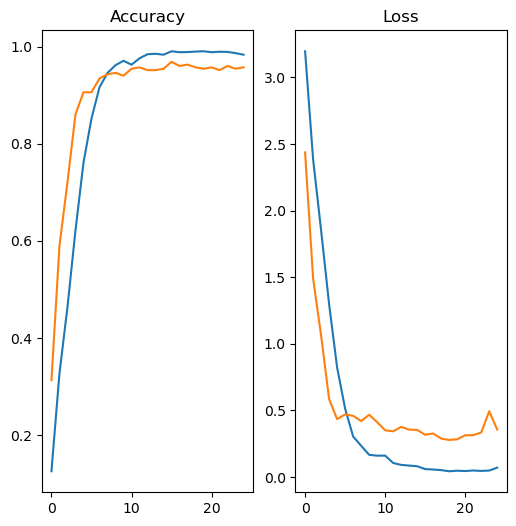

In [124]:
# accuracy vs loss graph

epochs_range = range(epochs_size)
plt.figure(figsize=(6,6))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range,history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [149]:
image = 'Deep Learning/Fruits_Vegetables/corn.jpg'
image = tf.keras.utils.load_img(image, target_size = (img_height, img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr, 0)

In [151]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [153]:
score = tf.nn.softmax(predict)

In [155]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)], np.max(score)*100))

Veg/Fruit in image is corn with accuracy of 68.16


In [157]:
model.save('Image_classify.keras')